# TP 4 : Boosting

## 0 - Introduction

L'objectif de ce premier TP est d'étudier les methodes d'ensemble, en particulier le Boosting.
Il sera à réaliser en python 3. Les librairies utilisées sont installées sur les machines de l'université et de l'Ensicaen, vous pouvez néanmoins les installer sur vos propres machines à l'aide de l'utilitaire pip présent par défaut avec python.
	
N'hésitez pas à regarder régulièrement la documentation de ces librairies, des exemples d'utilisation accompagnent généralement l'explication de chaque fonction.


Langage utilisé:
- Python 3: https://docs.python.org/3/

Librairie de math:
- Numpy: https://docs.scipy.org/doc/numpy/reference/
- Scipy: https://docs.scipy.org/doc/scipy/reference/

Librairie d'affichage de données:
- Matplotilb: https://matplotlib.org/contents.html

Librairie de traitement d'image:
- Scikit-image: https://scikit-image.org/

Librairie d'apprentissage automatique:
- Scikit-learn: http://scikit-learn.org

**Afin d'avoir un code optimisé, vous éviterez d'utiliser les instructions python3 `if`, `for` et `while` (sauf mention contraire dans le sujet).**

In [1]:
import numpy as np
import sklearn as skl
from sklearn import datasets
from sklearn.datasets import load_diabetes, make_circles
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler

import copy

## 1 - Récupération des données d'apprentissage et de test

Nous  allons  travailler  sur  des  données  d’apprentissage  réparties  en  deux  classes. Ces données sont issu de la base `iris`, disponible directement depuis `scikit learn`. 

Chaque exemple est composé des 4 caractéristiques suivantes:

1. Sepal length en cm
2. Sepal width en cm
3. Petal length in cm
4. Petal width in cm

In [2]:
X, y = datasets.load_iris(return_X_y=True)

En utilisant la fonction `train_test_split` de `scikit-learn` ( https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html ) découpez les données en deux ensembles (*train* et *val*) de sorte à ce que 80% des données soit dans *train* et 20% dans test. 
Vous nommerez les données `X_train` et `X_test` et les labels `y_train` et `y_test`.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

En utilisant un objet de la classe `StandardScaler` de scikit-learn ( https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html ) normalisez les données de manière à avoir la moyenne à 0 et l’écart-type à 1. Vous placerez le résultat dans les variables `X_train_` et `X_test_`.

L’opérateur précédent applique la transformation suivante: $z = \dfrac{x -  \mu}{\sigma}$.

In [11]:
from sklearn.preprocessing import StandardScaler

# Initialiser le StandardScaler
scaler = StandardScaler()

# Adapter (calculer la moyenne et l'écart-type) sur l'ensemble d'entraînement
scaler.fit(X_train)

# Normaliser les ensembles d'entraînement et de test
X_train_ = scaler.transform(X_train)
X_test_ = scaler.transform(X_test)

print(X_train_)
print("*********************************************************")
print(X_test_)

[[-0.95964876  0.56934563 -1.28582924 -1.26430253]
 [-0.95964876  1.04879458 -1.17270644 -0.74069148]
 [ 0.24619261 -0.38955227  0.46757427  0.4374334 ]
 [ 0.8491133   0.32962115  0.80694269  1.09194723]
 [ 0.60794503 -1.82789912  0.41101287  0.17562788]
 [-1.44198531  0.8090701  -1.28582924 -1.13339977]
 [ 0.24619261 -0.1498278   0.63725848  0.8301417 ]
 [ 1.09028158  0.08989668  0.41101287  0.30653064]
 [ 0.60794503 -0.86900122  0.69381988  0.8301417 ]
 [-0.83906462  1.767968   -1.17270644 -1.26430253]
 [ 0.36677675 -0.38955227  0.58069708  0.30653064]
 [-0.1155598  -0.38955227  0.29789006  0.17562788]
 [ 0.48736089 -0.38955227  0.35445146  0.17562788]
 [-0.83906462  0.8090701  -1.22926784 -1.26430253]
 [-1.20081704  0.08989668 -1.17270644 -1.26430253]
 [-1.32140118  0.32962115 -1.34239065 -1.26430253]
 [ 1.45203399  0.32962115  0.58069708  0.30653064]
 [ 0.72852917 -0.86900122  0.9200655   0.96104446]
 [ 1.09028158  0.08989668  1.08974971  1.61555828]
 [ 0.48736089  0.8090701   0.97

## 2 - Boosting à l'aide de Scikit-learn 

Nous utiliserons dans cette partie les fonctions de la librairie `scikit-learn` pour implémenter des méthodes de Boosting, en particulier AdaBoost.

Nous étudierons dans cette partie les différents éléments important du Boosting à savoir:
- le choix du modèle de base.
- le nombre de modèle de base.

Pour plus d'information sur l'utilisation d'AdaBoost dans `scikit-learn`, vous pouvez vous référer à la documentation : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

### 2.1 - AdaBoost par défaut

En vous basant sur la documentation ( https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html ), apprenez un AdaBoost avec `2` comme `nombre d'estimateur` et un `DecisionTreeClassifier` d'une profondeur maximum de `1` comme `estimateur de base` sur les données d'apprentissage normalisées `X_train_`, que vous nommerez `clf_boost`. Vous mettrez à 'SAMME' le paramètre `algorithm`.

In [12]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Créer un DecisionTreeClassifier de profondeur maximale 1
base_classifier = DecisionTreeClassifier(max_depth=1)

# Initialiser AdaBoostClassifier avec 2 estimateurs et 'SAMME' comme algorithme
clf_boost = AdaBoostClassifier(base_classifier, n_estimators=2, algorithm='SAMME')

# Entraîner le modèle sur les données d'apprentissage normalisées
clf_boost.fit(X_train_, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=2)

In [13]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(type(clf_boost),skl.ensemble._weight_boosting.AdaBoostClassifier,err_msg="\033[93m {}\033[00m" .format('Test 1 : Le type de clf_boost est incorrect.'))
    np.testing.assert_equal(type(clf_boost.base_estimator_),skl.tree._classes.DecisionTreeClassifier,err_msg="\033[93m {}\033[00m" .format('Test 2 : Le type de base_estimator est incorrect.'))
    try:
        assert 'estimator_weights_' in clf_boost.__dict__
    except Exception as e:
        raise AssertionError("\033[93m {}\033[00m" .format('Test 3 : Vous n\'avez pas appris clf_boost.'))
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


/home/messili231/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `base_estimator_` was deprecated in version 1.2 and will be removed in 1.4. Use `estimator_` instead.
  warnings.warn(msg, category=FutureWarning)


En utilisant la fonction `classification_report` ( https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html ) de `scikit_learn`, affichez les performances du classifieurs sur la base de test.

In [15]:
from sklearn.metrics import classification_report

y_train_pred = clf_boost.predict(X_train_)
y_test_pred = clf_boost.predict(X_test_)

# Classification report for the training set
report_train = classification_report(y_train, y_train_pred)
print("Classification Report for Training Set:\n", report_train)

# Classification report for the test set
report_test = classification_report(y_test, y_test_pred)
print("\nClassification Report for Test Set:\n", report_test)

Classification Report for Training Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.48      1.00      0.65        37
           2       0.00      0.00      0.00        40

    accuracy                           0.67       120
   macro avg       0.49      0.67      0.55       120
weighted avg       0.51      0.67      0.56       120


Classification Report for Test Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.57      1.00      0.72        13
           2       0.00      0.00      0.00        10

    accuracy                           0.67        30
   macro avg       0.52      0.67      0.57        30
weighted avg       0.48      0.67      0.55        30



/home/messili231/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/messili231/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/messili231/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/messili231/.local/l

À votre avis, cette première utilisation d’Adaboost est-elle performante ?

### 2.2 La validation croisée

Le nombre de paramètres à explorer est potentiellement important et il n'est pas toujours évident de connaiter les meilleurs combinaisons à utiliser pour un problème donné. `Scikit-learrn` met à disposition plusieurs solution pour explorer les paramètres possibles et calculer les performances finales. Vous retrouverez ces information à l'adresse: https://scikit-learn.org/stable/model_selection.html .
Nous allons dans cette partie, nous concentrer plus particulièrement sur la validation croisée: https://scikit-learn.org/stable/modules/cross_validation.html .
Commencez par lire en détail la documentation.

À l'aide de la classe `GridSearchCV` https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html , trouvez les meilleurs paramètres parmi les configurations suivantes pour une fonction de coût de type `accuracy`:
- Nombre estimateur entre [$1,20$].
- Base estimateur doit être soit un `perceptron` ou un `arbre de décision`.
- Dans le cas d'un `arbre de décision` vous ferez varier la profondeur maximum de l'arbre entre 1 et 10.

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron

# Create Perceptron object
clf = Perceptron()

# Define parameters to search
param_grid = {
    'max_iter': [1, 5, 10, 50, 100],  # Adjust this based on your needs
}

# Use GridSearchCV with accuracy scoring and 5-fold cross-validation
grid_search = GridSearchCV(clf, param_grid, scoring='accuracy', cv=5)

# Perform grid search on the normalized training data
grid_search.fit(X_train_, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Print the best accuracy
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'max_iter': 50}
Best Accuracy: 0.8583333333333332


/home/messili231/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/messili231/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/messili231/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/messili231/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/messili231/.lo

### 2.3 - Application d'une PCA sur les données

Afin de pouvoir visualiser les données vous devez appliquer une réduction de la dimensionnalité, pour cela nous allons appliquer une `PCA` sur les données `X_train_`. En vous basant sur la documentation (https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), apprenez une `PCA` avec 2 composantes conservées sur `X_train_` ensuite transformez `X_train_` et `X_train_` en `X_train_pca` `X_test_pca` .

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_train_)

X_train_pca = pca.fit_transform(X_train_)
X_test_pca = pca.fit_transform(X_test_)

# Utiliser LDA pour la réduction de dimensionnalité
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X_train_, y_train)

X_train_lda = lda.transform(X_train_)
X_test_lda = lda.transform(X_test_)

# Utiliser MDS pour la réduction de dimensionnalité
mds = MDS(n_components=2)
X_train_mds = mds.fit_transform(X_train_)
X_test_mds = mds.fit_transform(X_test_)

Apprendre le même classifieur (2 estimateurs, `DecisionTreeClassifier` de profondeur 1) que précédemment sur `X_train_pca`, vous l'appelerez `clf_boost_pca`.

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA

base_classifier = DecisionTreeClassifier(max_depth=1)

clf_boost_pca = AdaBoostClassifier(base_classifier, n_estimators=2, algorithm='SAMME')

clf_boost_pca.fit(X_train_pca, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=2)

En utilisant la fonction `classification_report` ( https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html ) de `scikit_learn`, affichez les performances du classifieurs sur la base de `X_test_pca`.

In [25]:
from sklearn.metrics import classification_report

# Make predictions on X_test_pca using clf_boost_pca
y_test_pca_pred = clf_boost_pca.predict(X_test_pca)

# Display the classification report
report_test_pca = classification_report(y_test, y_test_pca_pred)
print("Classification Report for Test Set with PCA:\n", report_test_pca)

Classification Report for Test Set with PCA:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.62      1.00      0.76        13
           2       0.00      0.00      0.00        10

    accuracy                           0.43        30
   macro avg       0.21      0.33      0.25        30
weighted avg       0.27      0.43      0.33        30



/home/messili231/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/messili231/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/messili231/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Que pouvez-vous dire des performances ?

### 2.4 Influence du nombre d'estimateur

Nous vous donnons le code suivant permettant de visualiser les performances du classifieur `clf` sur les données du TP.

In [26]:
def plot_boundary(clf, X_train, X_test, y_train, y_test,n_estimators, sample_weight=1):
    cm_bright = ListedColormap(["#FF0000", "#0000FF"]) if len(np.unique(y_train))==2 else ListedColormap(["#FF0000", "#00FF00", "#0000FF"]) 
    disp = DecisionBoundaryDisplay.from_estimator(clf, X_train, cmap=cm_bright, alpha=0.3, eps=0.5)
    disp.figure_.set_figheight(12)
    disp.figure_.set_figwidth(20)
    disp.ax_.scatter(X_train[:,0], 
                     X_train[:,1], 
                     c=y_train, 
                     cmap=cm_bright, 
                     edgecolors="k",
                     s=100*sample_weight
                    )

    if X_test is not None and y_test is not None:
        disp.ax_.scatter(X_test[:,0], 
                         X_test[:,1], 
                         c=y_test, 
                         cmap=cm_bright, 
                         edgecolors="k", 
                         marker='x',
                         s=100
                        )
    disp.ax_.set_title('nombre estimateur: '+str(n_estimators))
    plt.figure(figsize=(20, 10))

Faites varier le nombre d'estimateur utilisé entre 1 et 20 (en prenant une valeur sur 2) avec un arbre de décision de profondeur 1 pour l'estimateur de base et visualisez le changement dans la fonction apprise avec `plot_boundary`.

In [ ]:
# Faites varier le nombre d'estimateurs entre 1 et 20 avec un pas de 2
for n_estimators in range(1, 21, 2):
    # Création d'un classifieur AdaBoost avec un arbre de décision de profondeur 1
    clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                             n_estimators=n_estimators,
                             random_state=42)
    # Entraînement du classifieur
    clf.fit(X_train_pca, y_train)
    
    # Visualisation de la frontière de décision et des points de données
    plot_boundary(clf, X_train_pca, X_test_pca, y_train, y_test, n_estimators)

Même question que précédemment mais utilisez un `Perceptron` avec les paramètres par défaut comme estimateur de base.

In [ ]:
### Your Code Here
raise NotImplementedError()

## 3 - Implémentation d'Adaboost

AdaBoost (Adaptive Boosting) est une technique permettant d'améliorer les performances d'un algorithme de classification donné en prenant une somme pondérée intelligente de plusieurs instances du classificateur.

Cette technique est basée sur la construction itérative d'une série de classifieurs tout en conservant un vecteur de poids indiquant la qualité de la classification de chaque point par les classifieurs précédents. À chaque étape, l'algorithme tente de construire un classifieur qui corrige les erreurs commises par les classifieurs précédents.

En utilisant la notation suivante :

- N - est la taille de l'ensemble de données.
- $\{x_{i},y_{i}\}$ - Sont les features et les étiquettes entre {-1, 1}.

les étapes de cet algorithme sont les suivantes :

- Initialiser un vecteur de poids uniforme pour chaque point de données: $w^{(t=0)}_{i}=\frac{1}{N}$
- Itérer sur les étapes suivantes, avec un indice t, jusqu'à atteindre un certain critère d'arrêt :

    1. Construire un classifieur optimal $h_{t}$ selon les données pondérées données $w^{t-1}_{i}$
    2. Calculer l'erreur de prédiction de $h_{t}$ sur l'ensemble des données pondérées : $\epsilon=\dfrac{\sum_{i}w^{t}_{i}\mathbb{1}_{{h(x_{i}) \neq y_{i}}}}{\sum_{i}w^{t}_{i}}$.
    3. Calculer le poids pour le classifieur $h_{t}$ selon : $\alpha_{t}=\gamma \ln\left(\dfrac{1-\epsilon}{\epsilon}\right)$ avec $\gamma=\frac{1}{2}$ par défaut.
    4. Mettre à jour les poids des données selon $w^{t}_{i}=w^{t-1}_{i}\exp\left(-\alpha_{t} y_{i} h(x_{i})\right)$.
    5. Normaliser le poids par $Z=\sum_{i}w^{t}_{i}$ selon : $w^{t}_{i}=\frac{w^{t}_{i}}{Z}$.



- La prédiction finale sera alors la combinaison linéaire suivante des classifieurs entraînés : $h(x_{i})=\text{sign}\left(\sum_{t}\alpha_{t}h_{t}(x_{i})\right)$.

Écrivez une fonction `init_sample` qui initialise un vecteur de taille $N$ de poids uniforme pour chaque point de données: $w^{(t=0)}_{i}=\frac{1}{N}$

In [5]:
def init_sample(N):
    return [1/N] * N

In [6]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(init_sample(100), np.ones(100)/100,
                            err_msg="\033[93m {}\033[00m" .format('Test 1 : Les valeurs de init_sample ne sont pas bien initialisées.'))
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


Écrivez une fonction `copy_and_fit` qui va prendre en argument un estimator, un ensemble de données `{X,Y}` et les poids `sample_weight` ($w$ dans les formules précédentes) et qui retournera l'estimator apprit avec les `sample_weights`. Vous clonerez l'estimator avant de l'utiliser sur l'ensemble `{X,Y}` en utilisant librairie `copy`. Cette étape correspond à l'étape de construire d'un classifieur optimal $h_{t}$ selon les données pondérées données $w^{t-1}_{i}$.

In [14]:
def copy_and_fit(estimator, X, y, sample_weight):
    # Cloner l'estimateur
    estimator_copy = copy.deepcopy(estimator)
    
    # Ajuster l'estimateur sur les données avec les poids d'échantillon donnés
    estimator_copy.fit(X, y, sample_weight=sample_weight)
    
    return estimator_copy
    

Écrivez une fonction `estimate_error` qui va prendre en argument un estimator, un ensemble de données `{X,Y}` et les `sample_weight`. Cette fonction va renvoyé l'erreur de classification qui correspond à l'étape de calcule de l'erreur de prédiction de $h_{t}$ sur l'ensemble des données pondérées : $\epsilon=\dfrac{\sum_{i}w^{t}_{i}\mathbb{1}_{{h(x_{i}) \neq y_{i}}}}{\sum_{i}w^{t}_{i}}$. 

In [7]:
def estimate_error(estimator, X, y, sample_weight):
    # Fit the estimator on the data with the given sample weights
    fitted_estimator = copy_and_fit(estimator, X, y, sample_weight)
    
    # Make predictions using the fitted estimator
    predictions = fitted_estimator.predict(X)
    
    # Calculate the weighted sum of misclassifications
    error = np.sum(sample_weight[predictions != y])
    
    # Calculate the total sum of sample weights
    total_weight = np.sum(sample_weight)
    
    # Calculate the weighted error rate
    weighted_error = error / total_weight
    
    return weighted_error

Écrivez une fonction `compute_weight_classifier` qui prend en paramétres `classification_error` et $\gamma$. Cette fonction calcule le poids $\alpha_t$ pour le classifieur $h_{t}$ selon : $\alpha_{t}=\gamma \ln\left(\dfrac{1-\epsilon}{\epsilon}\right)$.

In [8]:
def compute_weight_classifier(classification_error, gamma=0.5):
    alpha_t = gamma * np.log((1 - classification_error) / classification_error)
    return alpha_t

Écrivez une fonction `update_sample_weight` qui prend en paramétres le poids pour le classifieur $h_{t}$ (`estimator_weight`), le poids des exemples (`sample_weight`) et les vecteurs y, y\_predict. Cette fonction retourne la mise à jour les poids des données selon $w^{t}_{i}=w^{t-1}_{i}\exp\left(-\alpha_{t} y_{i} h(x_{i}) \right)$ et normalise les poids par $Z=\sum_{i}w^{t}_{i}$ selon : $w^{t}_{i}=\frac{w^{t}_{i}}{Z}$.

In [10]:
def update_sample_weight(estimator_weight, sample_weight, y, y_predict):
    # Calculate the weight update factor
    weight_update = np.exp(-estimator_weight * y * y_predict)
    
    # Update sample weights
    sample_weight *= weight_update
    
    # Normalize sample weights
    sample_weight /= np.sum(sample_weight)
    
    return sample_weight

Écrivez une fonction `predict` qui prendra `X` un ensemble de données, la liste des estimators `estimators_list` et enfin `estimators_weights` la liste des poids de chaque classifieurs. Cette fonction va prédire la prédiction finale qui sera alors la combinaison linéaire suivante des classifieurs entraînés : $h(x_{i})=\text{sign}\left(\sum_{t}\alpha_{t}h_{t}(x_{i})\right)$.

In [11]:
def predict(X, estimators_list, estimators_weights):
    # Initialize an array to store the weighted sum of predictions
    weighted_sum_predictions = np.zeros(len(X))
    
    # Loop through each estimator and its corresponding weight
    for estimator, weight in zip(estimators_list, estimators_weights):
        # Make predictions using the current estimator
        predictions = estimator.predict(X)
        
        # Weight the predictions by the corresponding weight
        weighted_predictions = weight * predictions
        
        # Accumulate the weighted predictions
        weighted_sum_predictions += weighted_predictions
    
    # Apply sign function to get the final prediction
    final_predictions = np.sign(weighted_sum_predictions)
    
    return final_predictions

Remplissez la classe suivante avec les fonctions précédente.

In [12]:
class AdaBoost:
    def __init__(self, estimator=None, n_estimators=50, learning_rate=0.5):
        """
        estimator: L'estimateur de base à partir duquel l'ensemble boosté est construit.
        n_estimators:(int) Le nombre maximum d'estimateurs pour lequel le boosting est terminé.
        learning_rate: (float, default=1.0) Poids appliqué à chaque classificateur à chaque itération de boosting. 
        """
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        #Begin Solution
        self.estimator = estimator or DecisionTreeClassifier(max_depth=1) #Doit avoir Fit et Predict
        #End Solution
        self.sample_weight_list = []
        self.estimators_list = []
        self.estimator_weights_ = None
        self.estimator_errors_ = None
        self.transform = False
    
    def fit(self, X, y, sample_weight=None):
        # labels de type -1 / 1.
        if np.any(y==0):
            self.transform = True
            y[y==0] = -1
        else:
            self.transform = False
        
        #Initialisation des poids des samples
        sample_weight = sample_weight if sample_weight is not None else np.ones(len(X)) / len(X)
        
        #Reset any provious Fit
        self.sample_weight_list = []
        self.sample_weight_list.append(sample_weight.copy())
        self.estimators_list = []
        self.estimator_weights_ = np.zeros(self.n_estimators, dtype=np.float64)
        self.estimator_errors_ = np.ones(self.n_estimators, dtype=np.float64)
        
        for num_estimator in range(self.n_estimators):
            # Boosting step
            #Cloner et apprendre le current estimator
            estimator = copy_and_fit(self.estimator, X, y, sample_weight)
            
            # Fraction d'erreur
            estimator_error = estimate_error(estimator, X, y, sample_weight)
                        
            if estimator_error <= 0:
                estimator_weight = 1.0
                estimator_error = 0.0
                self.estimators_list.append(estimator)
                self.estimator_weights_[num_estimator] = estimator_weight
                self.estimator_errors_[num_estimator] = estimator_error
                break

            # Calcule du poids du classifieur
            estimator_weight = 0.5 * np.log((1.0 - estimator_error) / estimator_error)
            
            #Mise a jour des samples weight
            sample_weight = update_sample_weight(estimator_weight, sample_weight, y, estimator.predict(X))
        
            #Save Model, sample_weight, estimator_weights and estimator_errors
            self.sample_weight_list.append(sample_weight)
            self.estimators_list.append(estimator)
            self.estimator_weights_[num_estimator] = estimator_weight
            self.estimator_errors_[num_estimator] = estimator_error

        if self.transform:
            y[y==-1] = 0
        return self
    
    def predict(self, X):
        #Prediction
        final_predictions = predict(X, self.estimators_list, self.estimator_weights_)
        
        if self.transform:
            final_predictions[final_predictions == -1] = 0 
            
        return final_predictions

Testez votre modèle en utilisant `make_circles` de `scikit-learn` (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html). Vous allez utiliser 500 samples, un bruit de 0.04 et un facteur de 0.3.

Ensuite testez votre modèle en faisant varier le nombre d'estimateurs (utilisez la fonction plot_boundary)

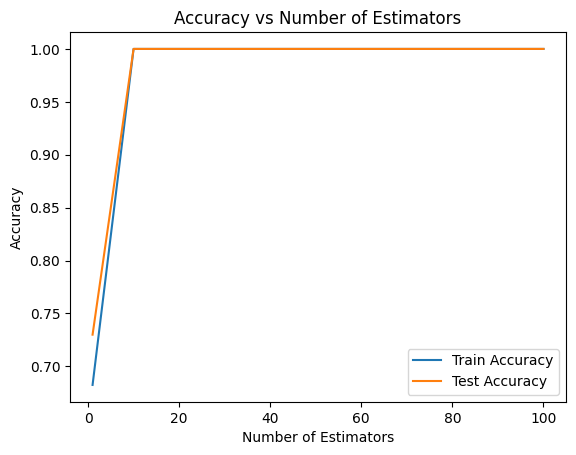

In [17]:
from sklearn.metrics import accuracy_score

# Generate synthetic data with make_circles
X, y = make_circles(n_samples=500, noise=0.04, factor=0.3, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define number of estimators to test
n_estimators_list = [1, 10, 50, 100]

# Initialize lists to store accuracy scores
train_accuracy = []
test_accuracy = []

# Train and test the AdaBoost model for each number of estimators
for n_estimators in n_estimators_list:
    # Initialize AdaBoost model
    ada_model = AdaBoost(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=n_estimators)
    
    # Train the model
    ada_model.fit(X_train, y_train)
    
    # Make predictions on training and test sets
    train_predictions = ada_model.predict(X_train)
    test_predictions = ada_model.predict(X_test)
    
    # Calculate accuracy scores
    train_accuracy.append(accuracy_score(y_train, train_predictions))
    test_accuracy.append(accuracy_score(y_test, test_predictions))

# Plotting the results
plt.plot(n_estimators_list, train_accuracy, label='Train Accuracy')
plt.plot(n_estimators_list, test_accuracy, label='Test Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators')
plt.legend()
plt.show()

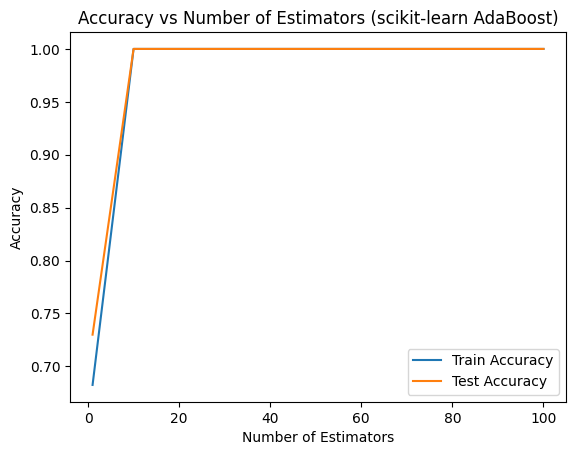

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier

# Generate synthetic data with make_circles
X, y = make_circles(n_samples=500, noise=0.04, factor=0.3, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define number of estimators to test
n_estimators_list = [1, 10, 50, 100]

# Initialize lists to store accuracy scores
train_accuracy = []
test_accuracy = []

# Train and test the AdaBoost model for each number of estimators
for n_estimators in n_estimators_list:
    # Initialize AdaBoost model
    ada_model = AdaBoostClassifier(n_estimators=n_estimators, random_state=42)
    
    # Train the model
    ada_model.fit(X_train, y_train)
    
    # Make predictions on training and test sets
    train_predictions = ada_model.predict(X_train)
    test_predictions = ada_model.predict(X_test)
    
    # Calculate accuracy scores
    train_accuracy.append(accuracy_score(y_train, train_predictions))
    test_accuracy.append(accuracy_score(y_test, test_predictions))

# Plotting the results
plt.plot(n_estimators_list, train_accuracy, label='Train Accuracy')
plt.plot(n_estimators_list, test_accuracy, label='Test Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators (scikit-learn AdaBoost)')
plt.legend()
plt.show()

## 4 - Implémentation Bagging

Le Bagging (Bootstrap Aggregating) est une technique utilisée pour améliorer les performances d'un algorithme de classification donné en combinant les prédictions de plusieurs instances du classifieur.

Cette technique est basée sur la création de plusieurs sous-ensembles de l'ensemble de données d'origine à travers le bootstrap, puis l'entraînement d'un classifieur sur chaque sous-ensemble. La prédiction finale est ensuite effectuée en agrégeant les prédictions de tous les classifieurs.

En utilisant la notation suivante :

N - est la taille de l'ensemble de données.
${x_{i},y_{i}}$ - représentent les caractéristiques et les étiquettes, où $y_{i}$ est la variable cible.
Les étapes de cet algorithme sont les suivantes :

Échantillonnage Bootstrap : Générer plusieurs sous-ensembles aléatoires (avec remplacement) de l'ensemble de données d'origine.
Entraînement d'un classifieur : Entraîner un classifieur sur chaque échantillon bootstrap.
Prédiction : Pour une entrée donnée $x_{i}$, agréger les prédictions de tous les classifieurs par vote majoritaire (pour les tâches de classification) ou moyennage (pour les tâches de régression).
Le Bagging aide à réduire la variance et le surajustement en moyennant les biais et en introduisant de l'aléatoire à travers l'échantillonnage bootstrap.

In [19]:
import numpy as np
from sklearn.utils import resample

class BaggingClassifier:
    def __init__(self, base_estimator, n_estimators=10):
        """
        base_estimator: L'estimateur de base à partir duquel chaque classifieur est construit.
        n_estimators: Le nombre d'estimateurs à utiliser dans le Bagging.
        """
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators
        self.estimators = []

    def fit(self, X, y):
        for _ in range(self.n_estimators):
            # Bootstrap sampling
            X_sample, y_sample = resample(X, y, replace=True, random_state=None)
            
            # Train base estimator on bootstrap sample
            estimator = self.base_estimator.fit(X_sample, y_sample)
            
            # Add trained estimator to list
            self.estimators.append(estimator)

    def predict(self, X):
        # Make predictions for each base estimator
        predictions = np.array([estimator.predict(X) for estimator in self.estimators])
        
        # Aggregate predictions by majority voting
        aggregated_predictions = np.mean(predictions, axis=0)
        return np.round(aggregated_predictions)